<a href="https://colab.research.google.com/github/ndavidson19/Stats-21/blob/main/Copy_of_ResearchApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/irsyadadam/DataRes-Research-App/blob/main/ResearchApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataRes Spring 22 Coding Assessment

The Research team will consist of a 2 hour long weekly meeting (at max, we will almost always end earier), seperated into 2 parts. The first part will be arranged so that you actually learn the necessary materials in order to succeed at the task designated for that meeting, and the second half will be you applying those specific skills into your project.

The overview for the Research Team will be as follows:

 - S22: Learning Neural Network Pipelines and Applications with tf.keras/pytorch

 - F23: Object Detection using tfhub and OpenCV

 - W23: Analysis of Social Structures using Graph Convolutional Networks via DGL and tf Framework


Email <code> irsyadadam@ucla.edu </code> if you have any questions or concerns.

To turn in the assessment, press the "Open in Colab" button, make a copy of the notebook and save it, and email me ur google colab or jupyter file under the subject "DataRes Research Applications."

## Working with MNIST Data

MNIST is quite literally the "Hello World" of ML. You are going to show me all the steps to classify this dataset! Make sure you annotate you code :). 

NOTE: It is okay if you are not able to compile all of the code AS YOU MIGHT STILL GET ACCEPTED; I'm also looking for good coding practices. Even so, it doesnt hurt to be able to finish and run this notebook :)

In [ ]:
# PLEASE USE GOOGLE COLAB AND UNCOMMENT IF YOU DONT ALREADY HAVE TENSORFLOW 2 ON UR LOCAL
# !pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)            

In [ ]:
#seeing the dataset
data = mnist.load_data()
print("Shape: ", np.shape(data))

#unpack tuple
(train_images, train_labels), (test_images, test_labels) = data

Shape:  (2, 2)


#### For the Next Portions, Please Finish All Code Marked with "TODO" AND FILL OUT "..."

Now its ur turn :) tf.keras > pytorch hehehe

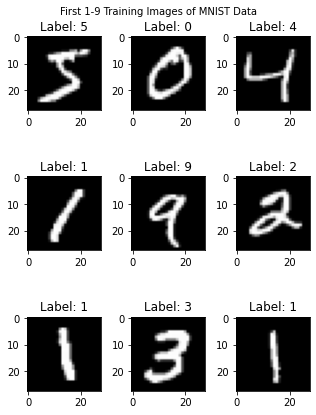


Training Images Shape: (60000, 28, 28)
Training Labels: [5 0 4 1 9 2 1 3 1]
Training Labels Shape: (60000,)


In [ ]:
digits = train_images[0:9]

#TODO: Plot the first 1 - 9 Training Images from the MNIST Data
# Create plot space with 3 rows and 3 cols
num_row = 3
num_col = 3
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

#plot images
for i in range(9):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))

#title and format images
plt.suptitle('First 1-9 Training Images of MNIST Data',fontsize=10)
plt.tight_layout()
plt.show()

#show shape of training labels
print("\nTraining Images Shape:", train_images.shape)
print("Training Labels:", train_labels[0:9])
print("Training Labels Shape:", train_labels.shape)

In [ ]:
#TODO: Create a tf.keras sequential model

class Model(tf.keras.Model):
    """ Model Subclassing API """
    def __init__(self) -> None:
        """
        creates 2 Dense Layers, first with relu activation and secaond with softmax activation
        """
        super(Model, self).__init__()

        # TODO: First layer takes in the shape of an image (28 x 28, ), spits out tensor shape 512, activation function is rectified linear unit
        self.layer1 = Dense(512, activation='relu')
        
        # TODO: second layer spits of a vector of 10 values, activation is softmax
        self.layer2 = Dense(10, activation = 'softmax')

    def call(self, input: np.array) -> tf.Tensor:
        """Every epoch, this function is called

        Args:
            input: input tensor or numpy array

        Returns:
            a tensor manpulated by the layers
        """
        # TODO: CREATE CALL FUNTION
        input = self.layer1(input)
        input = self.layer2(input)
        return input

In [ ]:
# TODO: Choose an appropriate loss function
loss_func = 'categorical_crossentropy'

#TODO: Choose an appropriate optimization function
optimizer = 'adam'

Please provide a brief explanation (1-3 sentences) regarding why you chose your 

*   List item
*   List item

specific optimization/loss functions (double click to edit):

I chose the adam (Adaptive Moment Estimation) as my optimizer function as it is very fast, stable, and I do not need to manualy change the learning rate as it adapts to the input data. The adam optimizer utilizes momentum to boost gradient descent to converge at a minima at a faster pace. I chose categorical corss entropy as my loss function as we are dealing with a classification problem that deals with more than two categories.


In [ ]:
model = Model()
model.compile(optimizer = optimizer, loss = loss_func, metrics = ["accuracy"])

 Why did the programmer quit his job?

Becuase he did not get arrays

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

Explain what the above code does in the above cell and why we need to do it (1-2 sentences):

The code that reshapes the train_images and test_images set is to remove the extra dimension off of the 28 x 28 x 1 tensor, by storing the 60,0000 and 10,000 images respectively as 60000 x 28 x 28 and 10000 x 28 x 28. For the conversion to float32, it is most common to use 32-bit precision in the training of nueral networks so at some point the data will be converted anyway so this saves storage in RAM. The division by 255 is the maximum value of a byte to normalize that the input features are scaled between (0.0-1.0).

In [ ]:
tf_train_labels = to_categorical(train_labels)
tf_test_labels = to_categorical(test_labels)

Explain what the above code does in the above cell and why we need to do it (1-2 sentences):

This code converts a class vector of integers into a binary class matrix. In non-technical terms, this transforms the input data into classes that are in a form that can be read by our model.

In [ ]:
# TODO: Create your own tf.keras.to_categorical function from scratch! 

def one_hot_encoding(input: np.array) -> np.array:
    """takes in a np array and one hot encodes it

    Args:
        input: is the input array

    Returns:
        a np.array that is one hot encoded
    """ 
    shape = (input.size, input.max()+1)
    one_hot = np.zeros(shape)
    rows = np.arange(input.size)
    one_hot[rows, input] = 1
    return one_hot

In [ ]:
assert (tf_train_labels == one_hot_encoding(train_labels)).all()
assert (tf_test_labels == one_hot_encoding(test_labels)).all()

In [ ]:
model.fit(train_images, tf_train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2672 - accuracy: 0.9236
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1082 - accuracy: 0.9688
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0701 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0499 - accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0373 - accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0278 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0203 - accuracy: 0.9949
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0151 - accuracy: 0.9961
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0131 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0102 - accuracy: 0.9977

How many software engineers does it take to change a light bulb?

None, darkness is a feature not a bug.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, tf_test_labels)
print('testAccuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9810
testAccuracy 0.9810000061988831


In [ ]:
# TODO: Create a function to predict the label of an MNIST image

def predict(model: tf.keras.Model, image: np.array) -> int:
    """Takes in an mnist image and spits out an integer corresponding to image

    Args:
        model: tf model used
        image: the np.array corresponding to image

    Returns:
        the integer corresponding to the number of the mnist image
    """
    predictions = model.predict(image)
    return predictions

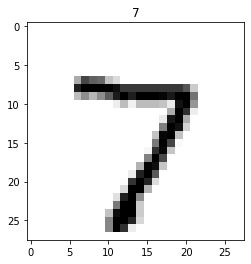


Prediction: 7


In [ ]:
#Use the model to predict
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

predictions = model.predict(test_images)
n = 0
plt.imshow(test_images[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title(np.argmax(predictions[n], axis=0))
plt.show()

print("\nPrediction:", np.argmax(predictions[n]))


What environment do you feel the most productive in?

I feel the most productive in an enviroments that allows for teamwork and open collaboration, as I get inspired off of others' strong work ethics.

### Thanks for completing, decisions should roll out end of week 1!

I appreciate you for taking the time and effort to complete this coding assement. Even if you didn't know everything, pushing all the way through is already a feat in itself, so I'm proud of you! Go ahead and email me your assessment with the subject "DataRes Research Application," regardless if you completed it or not. 

